<a href="https://colab.research.google.com/github/noushadkhan01/ML-and-DL-by-SuperDataScience/blob/master/Machine-Learning/Part%202%20-%20Regression/Section%207%20-%20Support%20Vector%20Regression%20(SVR)/SVR_on_Position_salary_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://bit.ly/3028Hi2')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


# Train Model without Position for better visualisation

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
#from sklearn.preprocessing import StandardScaler

In [0]:
def my_visualisation(X, y, kernel, penalty, degree = 1, evaluate = 6.5, scaling = False):
  from sklearn.preprocessing import StandardScaler
  evaluate = np.array([[evaluate]])
  if scaling:
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X = sc_X.fit_transform(X)
    y = sc_y.fit_transform(y)
    evaluate = sc_X.transform(evaluate)
 
  model = SVR(C = penalty, kernel = kernel, degree = degree).fit(X, y)
  plt.figure(figsize = (10, 5))
  plt.scatter(X, y, color = 'green')
  plt.plot(X, model.predict(X), c = 'blue')
  plt.scatter(evaluate, model.predict(evaluate), c = 'red', marker = 'o')
  plt.title('SVR')
  plt.show()

In [7]:
X = df[['Level']]
X.head(2)

,Level
0,1
1,2


In [8]:
y = df[['Salary']]
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


##without scaling

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


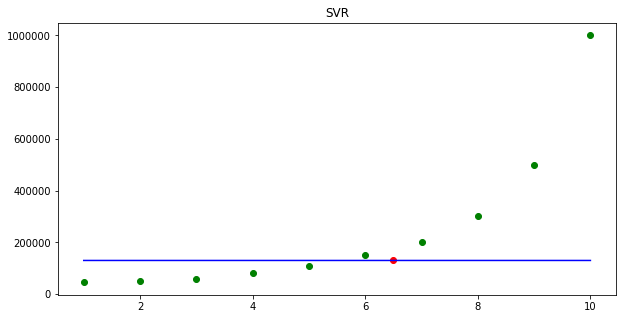

In [9]:
my_visualisation(X, y, kernel = 'rbf', penalty = 1.5, evaluate = 6.5)

##with scaling

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


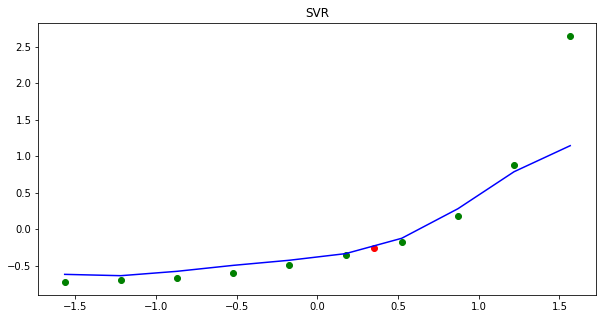

In [10]:
my_visualisation(X, y, kernel = 'rbf', penalty = 1.5, evaluate = 6.5, scaling = True)

### Linear Kernel

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


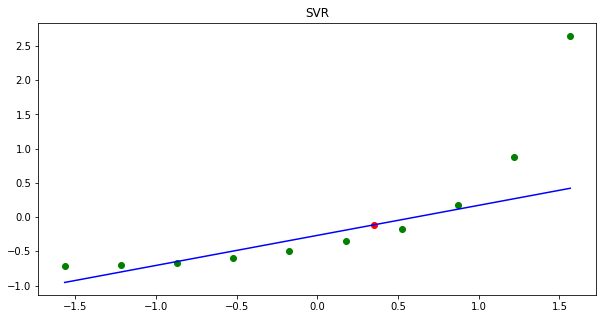

In [11]:
my_visualisation(X, y, kernel = 'linear', penalty = 1.5, evaluate = 6.5, scaling = True)

##Polynomial Kernel

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


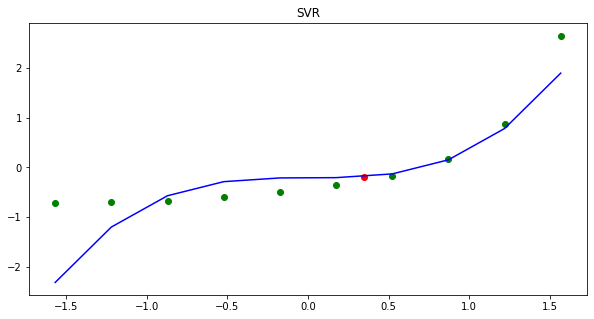

In [12]:
my_visualisation(X, y, kernel = 'poly', penalty = 1.5, degree = 3, evaluate = 6.5, scaling = True)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


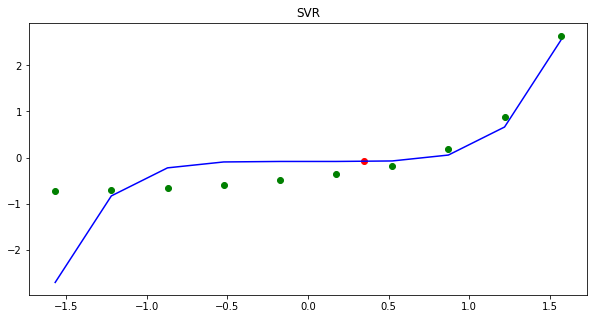

In [13]:
my_visualisation(X, y, kernel = 'poly', penalty = .5, degree = 5, evaluate = 6.5, scaling = True)